In [1]:
import numpy as np
import pandas as pd

In [2]:
data_pm = pd.read_csv("./best_20com_9pm_inuse.csv", header=0, index_col=[0])
index = data_pm.index.tolist()
print(index)
def read_csv(path):
    return pd.read_csv(path,index_col=[0,1],header=0)
path_budget_list=["./budget"+str(i)+".csv" for i in index]
df = [read_csv(name) for name in path_budget_list]
df = pd.concat(df,axis=1)
df.columns = index
print(df.columns)
print(df)
# df.to_csv("./Lamarck_budget.csv",header=True,index=True)

[590, 579, 588, 589, 569, 558, 542, 562]
Int64Index([590, 579, 588, 589, 569, 558, 542, 562], dtype='int64')
             590  579  588  589  569  558  542  562
F1  Times1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    Times2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    Times3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    Times4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    Times5   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
...          ...  ...  ...  ...  ...  ...  ...  ...
F13 Times16  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    Times17  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    Times18  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    Times19  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    Times20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[260 rows x 8 columns]


In [3]:
data_pm = pd.read_csv("./best_20com_9pm_inuse.csv", header=0, index_col=[0])
index = data_pm.index.tolist()
print(index)
def read_csv(path):
    return pd.read_csv(path,index_col=[0,1],header=0)
path_percent_list=["./combination"+str(i)+".csv" for i in index]
df = [read_csv(name) for name in path_percent_list]
df = pd.concat(df,axis=1)
df.columns = index
print(df.columns)
print(df)
df.to_csv("./Lamarck_rawdata.csv",header=True,index=True)

def percent(Function, optimal):
    dataframe = df.loc[(Function, slice(None)), :]
    dataframe = pd.DataFrame(data=dataframe.values,
                             columns=dataframe.columns)
    percent_dataframe = dataframe.applymap(lambda x: True if ((x-optimal)<=threshold or x<=optimal) else False)
    percent_dataframe["Function"] = Function
    return percent_dataframe

threshold =0.0001
opt = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -418.98 * 400, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0003, -1.0316, 0.398, 3.0,
       -3.86, -3.32, -10.1532,-10.4028, -10.5363]
function_list = [1,2,3,4,5,6,7,8,9,10,11,12,13]
percent_df = [percent(Function="F" + str(i), optimal=opt[i - 1]) for i in function_list]
percent_df = pd.concat(percent_df, axis=0)
percent_df = percent_df.groupby(["Function"]).sum().applymap(lambda x: str(x * 5) + "%")
index = ["F" + str(i) for i in function_list]
percent_df = percent_df.loc[index]
display(percent_df)
# percent_df.to_csv("./Lamarck_percent.csv")

[590, 579, 588, 589, 569, 558, 542, 562]
Int64Index([590, 579, 588, 589, 569, 558, 542, 562], dtype='int64')
                      590           579            588            589  \
F1  Times1   1.969667e+03  4.366153e+03     472.259063     118.946991   
    Times2   2.089774e+03  4.213202e+03     615.173722     106.192495   
    Times3   1.702839e+03  4.165967e+03     733.488461      88.908887   
    Times4   2.210982e+03  4.490744e+03     679.475200      90.796460   
    Times5   1.770653e+03  4.173390e+03     427.028138     110.512826   
...                   ...           ...            ...            ...   
F13 Times16  1.575145e+06  3.344090e+06  557567.390919  135415.569067   
    Times17  2.878678e+06  3.559382e+06  454484.240585   32609.039701   
    Times18  1.713619e+06  6.912815e+06  516002.740452   88581.422095   
    Times19  1.350619e+06  5.109595e+06  446153.232237  158276.377960   
    Times20  2.089561e+06  3.903078e+06  400856.523417   65945.243954   

              

,590,579,588,589,569,558,542,562
Function,,,,,,,,
F1,0%,0%,0%,0%,0%,0%,0%,0%
F2,0%,0%,0%,0%,0%,0%,0%,0%
F3,0%,0%,0%,0%,0%,0%,0%,0%
F4,0%,0%,0%,0%,0%,0%,0%,0%
F5,0%,0%,0%,0%,0%,0%,0%,0%
F6,0%,0%,0%,0%,0%,0%,0%,0%
F7,0%,0%,0%,0%,0%,0%,0%,0%
F8,0%,0%,0%,0%,0%,0%,0%,0%
F9,0%,0%,0%,0%,0%,0%,0%,0%


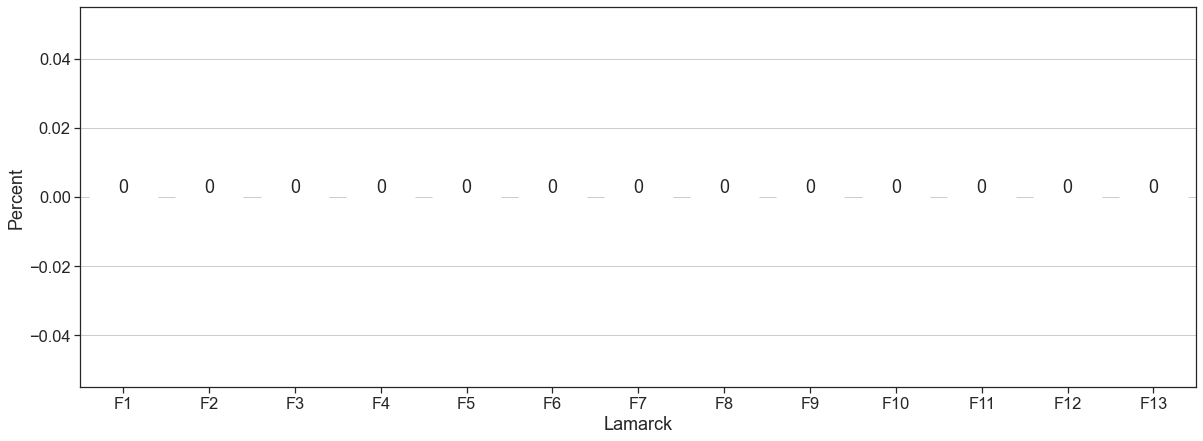

In [4]:
from matplotlib import pyplot as plt
dataframe = percent_df.copy()
dataframe = dataframe.applymap(lambda x:x if not '%' in str(x) else x.replace('%',''))
# display(dataframe)
import seaborn as sns
dataframe = dataframe.stack()
# display(dataframe)
dataframe = dataframe.rename_axis(index=["Function","Combinations"])
dataframe = dataframe.reset_index(level=[0, 1], name="Percent")
dataframe["Percent"] = pd.to_numeric(dataframe["Percent"])
dataframe = dataframe.reset_index(drop=False)
# display(dataframe)
function_list = ["F" + str(i) for i in range(1, 24, 1)]
def show_graph(dataframe):
    sns.set_theme(style="whitegrid", palette="pastel",font_scale=1.5)
    sns.set_style("ticks",{'axes.grid' : True})
    plt.figure(figsize=(20,7))
    plt.subplot(1,1,1)
    ax=sns.barplot(data=dataframe,y="Percent",x="Function",errorbar=None)
    ax.bar_label(ax.containers[0],label_type='edge')
    plt.xlabel("Lamarck")
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1))
    # plt.savefig("./Lamarck_percent.png", dpi=1200, bbox_inches='tight')
    plt.show()
show_graph(dataframe=dataframe)